In [131]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pylab as plt
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg
from sklearn.cluster import k_means
from sklearn.cluster import *
from imutils import paths
import random
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn import preprocessing
import copy

In [132]:
batch_size = 3
num_classes = 5
epochs = 10
imsize = 128

In [133]:
# input image dimensions
img_x, img_y = imsize, imsize
input_shape = (img_x, img_y,3)
print(input_shape)

(128, 128, 3)


In [134]:
print("[INFO] loading images...")

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('data/train')))
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
labels = []
data = []
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (128, 128))
    image = img_to_array(image)
    data.append(image)
 
    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
    labels, test_size=0.25, random_state=42)
 

le = preprocessing.LabelEncoder()
le.fit(labels)
trainY1 = to_categorical(le.transform(trainY).flatten())
testY1 = to_categorical(le.transform(testY).flatten())

[INFO] loading images...


In [135]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(imsize, imsize),
        batch_size=batch_size,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(imsize, imsize),
        batch_size=batch_size,
        class_mode='categorical')

Found 59 images belonging to 5 classes.
Found 15 images belonging to 5 classes.


In [211]:
train_generator.class_indices


{'110': 0, '12': 1, '140': 2, '260': 3, '7': 4}

In [189]:
type(train_generator2.classes[0])

numpy.int32

In [136]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [137]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

In [138]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 58, 58, 64)        51264     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 29, 29, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 53824)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               5382500   
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 505       
Total para

In [139]:
model.fit_generator(train_generator,
          epochs=epochs,
          verbose=1,
          validation_data=validation_generator,
          )
#model.fit(trainX, trainY1,batch_size=3,validation_data=(testX,testY1), epochs=epochs,verbose=1)

Epoch 1/10
20/20 [==============================] - 8s 424ms/step - loss: 1.6234 - acc: 0.2748 - val_loss: 1.5392 - val_acc: 0.2000
Epoch 2/10
20/20 [==============================] - 7s 359ms/step - loss: 1.4965 - acc: 0.3749 - val_loss: 1.5416 - val_acc: 0.4000
Epoch 3/10
20/20 [==============================] - 7s 362ms/step - loss: 1.4772 - acc: 0.3002 - val_loss: 1.3727 - val_acc: 0.3333
Epoch 4/10
20/20 [==============================] - 7s 363ms/step - loss: 1.2528 - acc: 0.5417 - val_loss: 1.3262 - val_acc: 0.4667
Epoch 5/10
20/20 [==============================] - 7s 362ms/step - loss: 1.2276 - acc: 0.4996 - val_loss: 1.5376 - val_acc: 0.2000
Epoch 6/10
20/20 [==============================] - 7s 358ms/step - loss: 1.1938 - acc: 0.5671 - val_loss: 1.3593 - val_acc: 0.4000
Epoch 7/10
20/20 [==============================] - 7s 357ms/step - loss: 0.9717 - acc: 0.6418 - val_loss: 1.2114 - val_acc: 0.4667
Epoch 8/10
20/20 [==============================] - 7s 363ms/step - loss: 0.

In [140]:
y = train_generator.classes
yval = validation_generator.classes

In [141]:
yp = model.predict_generator(train_generator)
yp = [np.argmax(x) for x in yp]
ypval = model.predict_generator(validation_generator)
ypval = [np.argmax(x) for x in ypval]

In [142]:
df = pd.DataFrame([y,yp])
df = df.transpose()
df.columns =['t','p']

In [143]:
def softmax(ftr):
    print('compute softmax probabilities')
    num, dim = ftr.shape[0], ftr.shape[1]
    print('num %d dim %d' % (num, dim))
    prob = np.zeros((num, dim), dtype=np.single)
    for i in range(num):
        max_val = np.max(ftr[i, :])
        row = ftr[i, :] - max_val
        exp_val = np.exp(row)
        prob[i, :] = exp_val / np.sum(exp_val)
    return prob 

In [144]:
num_classes = 5
num_values = 59
root = 'C:/Users/Devanshi/Documents/CS259/Google-Landmark-Recognition-master/mini_model/'

conf_mat = np.zeros((num_classes,num_classes))


In [145]:
'''
Hardcoding 100-class probabilities for validation images .
'''
class_prob = [14/59,16/59,5/59,14/59,10/59]
val_prob = np.zeros((num_values,num_classes))

for i in range(num_values):
    for j in range(num_classes):
        val_prob[i][j]=class_prob[j]
val_prob=softmax(val_prob)
#print(val_prob)


compute softmax probabilities
num 59 dim 5


In [146]:
for i in range(df.shape[0]):
    t = df.loc[i]['t']
    p = df.loc[i]['p']
    #print(conf_mat)
    conf_mat[t][p] =     conf_mat[t][p] +1
    #print(conf_mat)
for i in range(num_classes):
    conf_mat[i] = conf_mat[i]/sum(conf_mat[i])


In [147]:
#df

[[0.         0.6        0.2        0.         0.2       ]
 [0.125      0.5        0.0625     0.0625     0.25      ]
 [0.07142857 0.42857143 0.14285714 0.14285714 0.21428571]
 [0.2        0.1        0.1        0.3        0.3       ]
 [0.         0.21428571 0.28571429 0.28571429 0.21428571]]


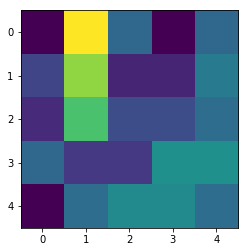

In [148]:
print(conf_mat)
plt.imshow(conf_mat)

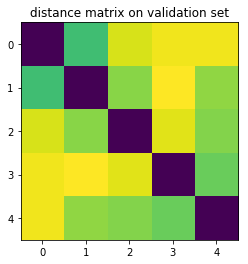

In [149]:
dist_mat = 1 - conf_mat
dist_mat[range(num_classes),range(num_classes)]=0
dist_mat = 0.5 * (dist_mat + dist_mat.T)
plt.figure()
plt.title('distance matrix on validation set')
plt.imshow(dist_mat)

[-0.4472136 -0.4472136 -0.4472136 -0.4472136 -0.4472136]


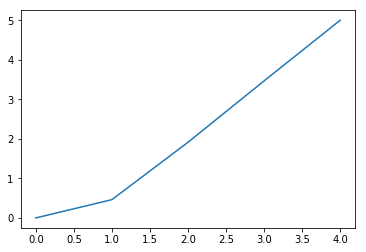

In [150]:
'''Laplacian eigenmap dimensionality reduction
construct adjacency graph W (symmetric) using k-NN'''
W=np.zeros((num_classes,num_classes))

k_nn, t, dim = 2, 0.9, 4

for i in range(num_classes):
    idx=np.argsort(dist_mat[i,:])[1:k_nn+1]
    W[i,idx]=np.exp(-dist_mat[i,idx] / t)
    W[idx,i]=W[i,idx]
D=np.zeros(W.shape)
for i in range(num_classes):
    D[i,i]=np.sum(W[i,:])
L=D-W
eig_val,eig_vec=scipy.linalg.eig(L,D)
ftr=eig_vec[:,1:dim+1]
print(eig_vec[:,0]) # the 1st eigenvector should be all ones
eigval_cumsum = np.cumsum(np.real(eig_val))
plt.plot(eigval_cumsum)

In [151]:
affinity_propagation_cluster = AffinityPropagation(damping=0.75, max_iter=15000, convergence_iter=50, copy=True) 
cluster_labels = affinity_propagation_cluster.fit_predict(ftr)
unique_cluster_label = np.unique(cluster_labels)
n_cluster = unique_cluster_label.shape[0]
cluster_members=[None]*n_cluster
print ('%d clusters' % n_cluster)

2 clusters


In [152]:
label_names=range(5)
for i in range(n_cluster):
    idx = np.nonzero(cluster_labels == unique_cluster_label[i])[0]
    cluster_members[i]=list(idx)
    print ('cluster %d size %d ' % (i, len(idx)))
    for j in range(len(idx)):
        print ('%s,' % label_names[idx[j]],)
    print (' ')
print(cluster_members)



cluster 0 size 4 
0,
1,
2,
4,
 
cluster 1 size 1 
3,
 
[[0, 1, 2, 4], [3]]


In [153]:
f2cmap = {}
for coarse in range(len(cluster_members)):
    for fine in cluster_members[coarse]:
        f2cmap[fine] = coarse


In [215]:
f2cmap

{0: 0, 1: 0, 2: 0, 3: 1, 4: 0}

In [154]:
val_fine = validation_generator.classes
val_coarse = [f2cmap[c] for c in val_fine]

In [155]:
# The number of coarse categories
coarse_categories = n_cluster

# The number of fine categories
fine_categories = num_classes

In [156]:
coarse_categories

2

In [157]:
fine_categories

5

In [158]:
fine2coarse = np.zeros((fine_categories,coarse_categories))
for i in range(coarse_categories):
    for j in cluster_members[i]:
        fine2coarse[j,i] = 1

In [159]:
fine2coarse

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [161]:
train_coarse = []
for i in df['t']:
    train_coarse.append(cluster_labels[i])
#df['coarse'] = train_coarse

In [162]:
df.head()

,t,p,coarse
0,0,4,0
1,0,1,0
2,0,2,0
3,0,1,0
4,0,1,0


In [260]:
#single classifier (shared)
from keras import optimizers
from keras.layers import Input, Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from keras.models import Model

in_layer = Input(shape=(128, 128, 3), dtype='float32', name='main_input')

net = Conv2D(384, 3, strides=1, padding='same', activation='elu')(in_layer)
net = MaxPooling2D((2, 2), padding='valid')(net)

net = Conv2D(384, 1, strides=1, padding='same', activation='elu')(net)
net = Conv2D(384, 2, strides=1, padding='same', activation='elu')(net)
net = Conv2D(640, 2, strides=1, padding='same', activation='elu')(net)
net = Conv2D(640, 2, strides=1, padding='same', activation='elu')(net)
net = Dropout(.2)(net)
net = MaxPooling2D((2, 2), padding='valid')(net)

net = Conv2D(640, 1, strides=1, padding='same', activation='elu')(net)
net = Conv2D(768, 2, strides=1, padding='same', activation='elu')(net)
net = Conv2D(768, 2, strides=1, padding='same', activation='elu')(net)
net = Conv2D(768, 2, strides=1, padding='same', activation='elu')(net)
net = Dropout(.3)(net)
net = MaxPooling2D((2, 2), padding='valid')(net)

net = Conv2D(768, 1, strides=1, padding='same', activation='elu')(net)
net = Conv2D(896, 2, strides=1, padding='same', activation='elu')(net)
net = Conv2D(896, 2, strides=1, padding='same', activation='elu')(net)
net = Dropout(.4)(net)
net = MaxPooling2D((2, 2), padding='valid')(net)

net = Conv2D(896, 3, strides=1, padding='same', activation='elu')(net)
net = Conv2D(1024, 2, strides=1, padding='same', activation='elu')(net)
net = Conv2D(1024, 2, strides=1, padding='same', activation='elu')(net)
net = Dropout(.5)(net)
net = MaxPooling2D((2, 2), padding='valid')(net)

net = Conv2D(1024, 1, strides=1, padding='same', activation='elu')(net)
net = Conv2D(1152, 2, strides=1, padding='same', activation='elu')(net)
net = Dropout(.6)(net)
net = MaxPooling2D((2, 2), padding='same')(net)

net = Flatten()(net)
net = Dense(1152, activation='elu')(net)
net = Dense(fine_categories, activation='softmax')(net)

In [261]:
model = Model(inputs=in_layer,outputs=net)
sgd_coarse = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer= sgd_coarse, loss='categorical_crossentropy', metrics=['accuracy'])

In [262]:
batch = 64
index= 0
step = 1
stop = 1

while index < stop:
    model.fit_generator(train_generator,
          epochs=index+step,
          verbose=1, initial_epoch=index,
          validation_data=validation_generator,
          )
    #model.fit_generator(train_generator, batch_size=batch, initial_epoch=index, epochs=index+step,
    index += step
    model.save_weights('data/models/model_coarse'+str(index))
save_index = index

Epoch 1/1
20/20 [==============================] - 418s 21s/step - loss: 11.0954 - acc: 0.2248 - val_loss: 12.4679 - val_acc: 0.2000


In [268]:
sgd_fine = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [269]:
for i in range(len(model.layers)):
    model.layers[i].trainable=False

In [270]:
net = Conv2D(1024, 1, strides=1, padding='same', activation='elu')(model.layers[-8].output)
net = Conv2D(1152, 2, strides=1, padding='same', activation='elu')(net)
net = Dropout(.6)(net)
net = MaxPooling2D((2, 2), padding='same')(net)

net = Flatten()(net)
net = Dense(1152, activation='elu')(net)
out_coarse = Dense(coarse_categories, activation='softmax')(net)

model_c = Model(inputs=in_layer,outputs=out_coarse)
model_c.compile(optimizer= sgd_coarse, loss='categorical_crossentropy', metrics=['accuracy'])

for i in range(len(model_c.layers)-1):
    model_c.layers[i].set_weights(model.layers[i].get_weights())

In [271]:
model_c.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 128, 128, 384)     10752     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 64, 64, 384)       0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 64, 64, 384)       147840    
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 64, 64, 384)       590208    
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 64, 64, 640)       983680    
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 64, 64, 640)       1639040   
__________

In [272]:
trg_copy =copy.copy(train_generator)
val_copy = copy.copy(validation_generator)
# trg_fc = trg_copy.classes
val_fc = val_copy.classes
trg_copy.classes = np.array([f2cmap[f] for f in trg_fc])
val_copy.classes = np.array([f2cmap[f] for f in val_fc])
#trg_copy.classes

In [273]:
# import os
# print(train_generator.class_indices)

# directory = root+"/data/"
# src = root+"/data/train/"
# for c in range(coarse_categories):
#     if not os.path.exists(directory+"/"+str(c)):
#         os.makedirs(directory+"/"+str(c))

# for key,value in train_generator.class_indices:
#     c = f2cmap[value]
    
#     #TODO
        

In [274]:
import shutil
#shutil.copy2(src+"140",directory+"/0")
os.system('xcopy '+ src+"140/*" +" "+ directory+"/0/")
print('cp '+ src+"140/*.*" +" "+ directory+"/0/")

cp C:/Users/Devanshi/Documents/CS259/Google-Landmark-Recognition-master/mini_model//data/train/140/*.* C:/Users/Devanshi/Documents/CS259/Google-Landmark-Recognition-master/mini_model//data//0/


In [275]:
train_generator2 = train_datagen.flow_from_directory(
        'data/train3',
        target_size=(imsize, imsize),
        batch_size=batch_size,
        class_mode='categorical')
validation_generator2 = test_datagen.flow_from_directory(
        'data/validation3',
        target_size=(imsize, imsize),
        batch_size=batch_size,
        class_mode='categorical')

Found 59 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [276]:
train_generator2.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [277]:
index = 2
step = 1
stop = 3

while index < stop:
    #model_c.fit(x_train, y_train_c, batch_size=batch, initial_epoch=index, epochs=index+step, validation_data=(x_val, y_val_c), callbacks=[tbCallBack])
    model_c.fit_generator(train_generator2,
          epochs=index+step,
          verbose=1, initial_epoch=index,
          validation_data = validation_generator2
          )
    index += step

Epoch 3/3
20/20 [==============================] - 166s 8s/step - loss: 3.7576 - acc: 0.7665 - val_loss: 3.2236 - val_acc: 0.8000


In [278]:
def fine_model(nfine):
    net = Conv2D(1024, 1, strides=1, padding='same', activation='elu')(model.layers[-8].output)
    net = Conv2D(1152, 2, strides=1, padding='same', activation='elu')(net)
    net = Dropout(.6)(net)
    net = MaxPooling2D((2, 2), padding='same')(net)

    net = Flatten()(net)
    net = Dense(1152, activation='elu')(net)
    out_fine = Dense(nfine, activation='softmax')(net)
    model_fine = Model(inputs=in_layer,outputs=out_fine)
    model_fine.compile(optimizer= sgd_coarse,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    for i in range(len(model_fine.layers)-1):
        model_fine.layers[i].set_weights(model.layers[i].get_weights())
    return model_fine

In [280]:
fine_models = {'models' : [{} for i in range(coarse_categories)], 'yhf' : [{} for i in range(coarse_categories)]}
for i in range(coarse_categories):
    model_i = fine_model(len(cluster_members[i]))
    fine_models['models'][i] = model_i

In [281]:
def get_error(y,yh):
    # Threshold 
    yht = np.zeros(np.shape(yh))
    yht[np.arange(len(yh)), yh.argmax(1)] = 1
    # Evaluate Error
    error = np.count_nonzero(np.count_nonzero(y-yht,1))/len(y)
    return error

In [282]:
traingenlist = []
valgenlist = []
for i in range(coarse_categories):
    tgen = train_datagen.flow_from_directory(
            'data/train3/'+str(i),
            target_size=(imsize, imsize),
            batch_size=batch_size,
            class_mode='categorical')
    vgen = test_datagen.flow_from_directory(
            'data/validation3/'+str(i),
            target_size=(imsize, imsize),
            batch_size=batch_size,
            class_mode='categorical')
    traingenlist.append(tgen)
    valgenlist.append(vgen)

Found 49 images belonging to 4 classes.
Found 12 images belonging to 4 classes.
Found 10 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


In [285]:
for cat in range(coarse_categories):
    index= 0
    step = 1
    stop = 2
    
    # Get all training data for the coarse category
    #ix = np.where([(y[:,j]==1) for j in [k for k, e in enumerate(fine2coarse[:,i]) if e != 0]])[1]
    ix = [i for i,j in f2cmap.items() if j==cat]
    print(ix)
    
    while index < stop:
        fine_models['models'][cat].fit_generator(traingenlist[cat],
          epochs=index+step,
          verbose=1, initial_epoch=index,
          validation_data = valgenlist[cat]
          )
        index += step
    
    fine_models['models'][cat].compile(optimizer=sgd_fine, loss='categorical_crossentropy', metrics=['accuracy'])
    stop = 10

    while index < stop:
        fine_models['models'][cat].fit_generator(traingenlist[cat],
          epochs=index+step,
          verbose=1, initial_epoch=index,
          validation_data = valgenlist[cat]
          )
        index += step
        
    yh_f = fine_models['models'][cat].predict_generator(valgenlist[cat])
    print('Fine Classifier '+str(cat)+' Error: ')
    #str(get_error(y_val[ix_v],yh_f)))
    
    

[0, 1, 2, 4]
Epoch 1/1
17/17 [==============================] - 138s 8s/step - loss: 11.0865 - acc: 0.3122 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 2/2
17/17 [==============================] - 135s 8s/step - loss: 11.0865 - acc: 0.3122 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 3/3
17/17 [==============================] - 133s 8s/step - loss: 11.6835 - acc: 0.2751 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 4/4
14/17 [=======================>......] - ETA: 19s - loss: 12.2805 - acc: 0.2381

KeyboardInterrupt: 

In [1]:
##predictions from model_c.predict
coarse_predictions = [] # dim: n_images_predict X n_classes_coarse
##predictions from <n_classes_course> fine classifiers
fine_predictions = [] #dim:  n_classes_coarse X n_images_predict X n_classes_fine

In [2]:
prection_size = len(images_predict)
predictions = []
for img in range(prection_size):
    proba = [0]*n_classes_fine
    for finec in range(n_classes_fine):
        for coarsec in range(n_classes_course):
            proba[finec] += coarse_predictions[img][coa]*fine_predictions[coarsec][img][finec]
    predicted = np.argmax(proba)
    predictions.append(predicted)

SyntaxError: unexpected EOF while parsing (<ipython-input-2-63dbba779b70>, line 3)